# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Ensemble classification and hyperparameter tuning
## Preparations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

In [2]:
# Read the previously used liver spectroscopy data set
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)

['collagen' 'glycogen' 'lipids' 'DNA']


,1801,1797,1793,1789,1785,1781,1778,1774,1770,1766,...,937,933,929,925,921,917,914,910,906,902
730,0.148,0.149,0.150,0.151,0.151,0.152,0.154,0.156,0.159,0.161,...,0.202,0.202,0.202,0.201,0.200,0.199,0.197,0.195,0.192,0.190
241,0.093,0.093,0.093,0.093,0.093,0.094,0.095,0.098,0.099,0.100,...,0.221,0.223,0.223,0.221,0.219,0.215,0.211,0.206,0.203,0.200
347,0.103,0.103,0.104,0.104,0.104,0.105,0.106,0.108,0.110,0.110,...,0.220,0.221,0.221,0.219,0.217,0.214,0.211,0.207,0.203,0.200
253,0.129,0.129,0.129,0.129,0.128,0.128,0.129,0.130,0.131,0.131,...,0.234,0.237,0.238,0.237,0.236,0.234,0.231,0.227,0.225,0.223
561,0.095,0.095,0.095,0.094,0.093,0.093,0.093,0.095,0.098,0.103,...,0.236,0.237,0.239,0.239,0.240,0.239,0.238,0.235,0.233,0.233
496,0.102,0.102,0.103,0.103,0.103,0.104,0.105,0.107,0.113,0.124,...,0.212,0.215,0.218,0.220,0.223,0.224,0.225,0.225,0.225,0.226
110,0.148,0.149,0.149,0.150,0.150,0.151,0.151,0.152,0.154,0.155,...,0.197,0.197,0.196,0.195,0.193,0.191,0.189,0.186,0.184,0.182
120,0.129,0.129,0.130,0.131,0.130,0.131,0.132,0.134,0.135,0.136,...,0.230,0.231,0.231,0.230,0.229,0.227,0.225,0.222,0.220,0.218
82,0.139,0.140,0.140,0.141,0.141,0.142,0.143,0.145,0.146,0.148,...,0.231,0.231,0.231,0.231,0.230,0.228,0.225,0.223,0.221,0.220
551,0.101,0.102,0.102,0.102,0.102,0.103,0.104,0.106,0.111,0.118,...,0.221,0.222,0.222,0.222,0.222,0.219,0.217,0.214,0.212,0.211


<Axes: >

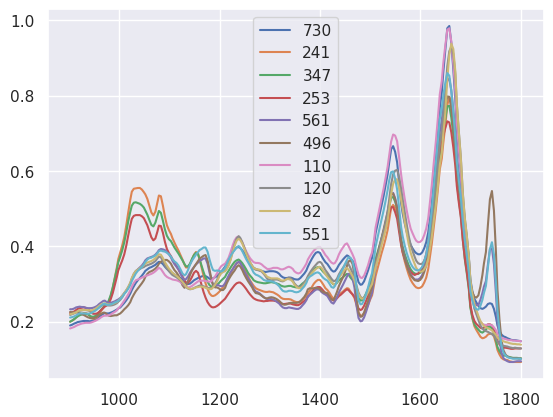

In [3]:
# Parse the column index to integer wavelengths using a lambda-function
wl=D.columns[:-1].map(lambda x: int(float(x)))

# Separate the numerical data from liver spectroscopy to design matrix X
X=D.iloc[:,:-1]

# Assign numerical values to column names, so that the plot is prettier
X.columns=wl

# Print and plot 10 randomly selected samples from the data
sample=X.sample(10)
display(sample)
sample.T.plot()

## Task 1: Apply the extratrees classifier

Import Extratrees classifier from `sklearn.ensemble`, instantiate a classifier with following parameters. 
 - number of estimators = 10
 - maximum depth = 3
 - minimum samples split = 2

When the predictor is trained with these ad-hoc parameters, study its performance with following 5 methods

 1. Styled confusion matrix: `display(pd.crosstab(....))`
 3. Accuracy: `print(metrics.accuracy_score(...))`
 4. More accuracy measures: `print(metrics.classification_report(...))`
 5. Check accuracy with cross validation: `print(cross_val_score(...))` using three-fold cross validation
 6. Calculate the mean of cross validation results over all folds

You can check what recall and f1-score means from SKlearn documentation, page [Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

You can import [Extratrees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) from [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) Import also [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) from sklearn since it contains all important classifier metrices. And import cross_val_score from [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| classifier, estimator | `est` |
| Accuracy | `accuracy` |
| Cross val accuracy | `cv_accuracy` |
| Confusion matrix, made with crosstab | `cm` |

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(types)

In [12]:
y.shape

(731,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# YOUR CODE HERE
from sklearn.ensemble import ExtraTreesClassifier
est = ExtraTreesClassifier(n_estimators=10, max_depth=3, min_samples_split=2)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

In [17]:
y_pred.shape

(242,)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
accuracy=accuracy_score(y_test, y_pred)
cv_accuracy=cross_val_score(est, X, y, cv=3)

In [27]:
print(cv_accuracy)

[0.90983607 0.91393443 0.87654321]


In [29]:
mean_cv_accuracy = np.mean(cv_accuracy)
mean_cv_accuracy

0.9001045672266073

In [32]:
cm=pd.crosstab(y_test, y_pred)

In [33]:
display(cm)

col_0,0,1,2,3
row_0,,,,
0,12,13,0,10
1,0,66,0,0
2,0,0,76,0
3,1,0,0,64


In [25]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.34      0.50        35\n           1       0.84      1.00      0.91        66\n           2       1.00      1.00      1.00        76\n           3       0.86      0.98      0.92        65\n\n    accuracy                           0.90       242\n   macro avg       0.91      0.83      0.83       242\nweighted avg       0.91      0.90      0.88       242\n'

In [34]:
import sklearn
errorfound=False
require=('est', 'accuracy', 'cv_accuracy', 'cm')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True

if type(est) != sklearn.ensemble.ExtraTreesClassifier:
    print("The classifier is of wrong type")
    errorfound=1
if not errorfound:
    print("No errrors found this far, your code may work :)")


No errrors found this far, your code may work :)


## Task 2, optimize the classifier

Lets try now to find optimal parameters controlling the model (=hyperparameters) for the classifier with grid search CV. Search the parameters:
 - `n_estimators`
 - `max_depth` and
 - `min_samples_split`

Use the previously used extratrees classifier as a starting point

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Tunable parameters structure | `params` |
| Grid search object | `cv_est` |

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
params = [{'n_estimators': range(10,25), 'max_depth': range(3,15),
                     'min_samples_split': range(2,20)}]
cv_est=GridSearchCV(est, params, cv=3)
cv_est.fit(X_train, y_train);


In [37]:
errorfound=False
require=('params', 'cv_est')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        

## Task 3

Having trained your estimator, check what where the optimal parameters, and compare the CV-accuracy with the previous model and plot the confusion matrix with crosstab as well. Did it improve?

Notice that you will find the optimised estimator as `cv_est.best_estimator_`, and you can see all its parameters with `est_opt.get_params()`.

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Optimal, tuned predictor | `est_opt` |
| Cross validation accuracy | `cv_opt` |
| Confusion matrix  | `cm_opt` |

In [38]:
est_opt=cv_est.best_estimator_

print("Accurary in the training set..%f" % accuracy_score(y_true=y_train, y_pred=est_opt.predict(X_train)))
print("Accurary in the test set......%f" % accuracy_score(y_true=y_test, y_pred=est_opt.predict(X_test)))
print(est_opt)

Accurary in the training set..0.997955
Accurary in the test set......0.991736
ExtraTreesClassifier(max_depth=16, min_samples_split=7, n_estimators=10)


In [39]:
# YOUR CODE HERE
cv_opt=cross_val_score(est_opt, X, y, cv=3)
cv_opt

array([0.9057377 , 0.99180328, 0.98765432])

In [40]:
mean_cv_opt = np.mean(cv_opt)
mean_cv_opt

0.9617317681980705

In [42]:
y_pred_opt = est_opt.predict(X_test)

In [43]:
cm_opt=pd.crosstab(y_test, y_pred_opt)

In [44]:
display(cm_opt)

col_0,0,1,2,3
row_0,,,,
0,34,1,0,0
1,1,65,0,0
2,0,0,76,0
3,0,0,0,65


In [45]:
errorfound=False
require=('est_opt', 'cv_opt', 'cm_opt')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        